<a href="https://colab.research.google.com/github/nzaw96/Predicting-Grain-Production-in-Ukraine/blob/main/Ukraine_Hackathon_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This file contains the code for the EDA.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
from google.colab import files

uploaded = files.upload()

In [ ]:

df = pd.read_csv('Ukraine_dataset.csv')
df = df.fillna(method='ffill')
df.head()

In [ ]:
# Some of the numerical columns are imported as string so we need to convert them back to int

# The following for-loop loops over the columns and if a column has object/string datatype when it should
# be int, it converts it to int
for col in df.columns:
    if df[col].dtypes == 'object':
        first_entry = df[col].tolist()[0].replace(',', '')
        if first_entry.isnumeric():
            df[col] = df[col].apply(lambda x: re.sub(r'\W', '', x))
            df[col] = df[col].apply(lambda x: int(x))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Commodity              288 non-null    object 
 1   Year                   288 non-null    object 
 2   Country                288 non-null    object 
 3   Area Harvested         288 non-null    int64  
 4   Beginning Stocks       288 non-null    int64  
 5   Production             288 non-null    int64  
 6   Imports                288 non-null    int64  
 7   Total Supply           288 non-null    int64  
 8   Exports                288 non-null    int64  
 9   Feed Dom. Consumption  288 non-null    int64  
 10  Fsi Consumption        288 non-null    int64  
 11  Domestic Consumption   288 non-null    int64  
 12  Ending Stocks          288 non-null    int64  
 13  Yield                  288 non-null    float64
dtypes: float64(1), int64(10), object(3)
memory usage: 31.6+ KB

In [ ]:
# We need to change 'Year' from the format of 'Year1/Year2' to Year1

df['Year'] = df['Year'].apply(lambda x: int(x[:4]))
df.head()

In [ ]:
uploaded = files.upload()

In [ ]:
# Now, let's read in the other csv files. The population data was extracted from World Bank.
df_pops = pd.read_csv('population.csv')
df_rural_pops = pd.read_csv('rural_population.tsv', sep='\t')

In [ ]:
df_pops.head()

,Country Name,Country Code,Indicator Name,1960,1961,1962,1963,1964,1965,1966,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Population, total",54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,AFE,"Population, total",130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,AFG,"Population, total",8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,AFW,"Population, total",96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,AGO,"Population, total",5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


In [ ]:
df_pops.drop(columns=['Country Code', 'Indicator Name'], inplace=True)
df_pops.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,58044.0,58377.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,161156430.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,10637064.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,112195950.0,114781116.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,5774440.0,5771973.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


In [ ]:
# Now drop the data entries that are prior to 1987, since we only need the population data from 1987.

drop_col_list = list(range(1960, 1987))
drop_col_list = [str(col) for col in drop_col_list]
df_pops.drop(columns=drop_col_list, inplace=True)
df_rural_pops.drop(columns=drop_col_list, inplace=True)
df_rural_pops.head()

,Country Name,1987,1988,1989,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,49.635000,49.650000,49.665000,49.681000,49.696000,50.002000,50.412000,50.823000,51.233000,...,57.060000,57.043000,57.010000,56.959000,56.892000,56.808000,56.707000,56.589000,56.454000,56.303000
1,Africa Eastern and Southern,76.534757,76.068015,75.593876,75.080776,74.591764,74.079281,73.586070,73.187712,72.830383,...,67.358452,66.928313,66.492452,66.047576,65.594916,65.134899,64.667627,64.192230,63.708678,63.216694
2,Afghanistan,79.686000,79.002000,78.912000,78.823000,78.734000,78.645000,78.556000,78.466000,78.376000,...,76.052000,75.840000,75.627000,75.413000,75.197000,74.980000,74.750000,74.505000,74.246000,73.974000
3,Africa Western and Central,70.909788,70.260937,69.631685,68.999166,68.530891,68.121697,67.718488,67.315882,66.907482,...,57.735337,57.098965,56.469296,55.842869,55.218627,54.598191,53.980666,53.366862,52.757147,52.151375
4,Angola,67.022000,65.657000,64.269000,62.856000,61.420000,59.961000,58.489000,57.000000,55.831000,...,39.472000,38.732000,37.998000,37.269000,36.554000,35.851000,35.161000,34.486000,33.823000,33.175000


In [ ]:
df_pops.head()

,Country Name,1987,1988,1989,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,61838.0,61072.0,61033.0,62152.0,64623.0,68240.0,72495.0,76705.0,80324.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,279184536.0,287524258.0,296024639.0,304648010.0,313394693.0,322270073.0,331265579.0,340379934.0,349605660.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,11604538.0,11618008.0,11868873.0,12412311.0,13299016.0,14485543.0,15816601.0,17075728.0,18110662.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,188868567.0,194070079.0,199382783.0,204803865.0,210332267.0,215976366.0,221754806.0,227692136.0,233807627.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,10689247.0,11068051.0,11454784.0,11848385.0,12248901.0,12657361.0,13075044.0,13503753.0,13945205.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


In [ ]:
df_temp_ukr = df_pops[df_pops['Country Name'] == 'Ukraine']

In [ ]:
ukr_pop = df_temp_ukr.iloc[0].tolist()[1:]


In [ ]:
# same thing with rural population

df_temp_ukr2 = df_rural_pops[df_rural_pops['Country Name'] == 'Ukraine']
ukr_rural_pop = df_temp_ukr2.iloc[0].tolist()[1:]


In [ ]:
# since we don't have population and rural pop for 2021, we will use the value for 2020 for 2021
# this is equivalent to pandas fillna() with method='ffill'

ukr_pop.append(ukr_pop[-1])
ukr_rural_pop.append(ukr_rural_pop[-1])

In [ ]:
# this dataframe specifically contains the population data.
df_ukr_pops = pd.DataFrame({'Year': list(range(1987, 2022)), 
                       'Population': ukr_pop,
                       'Rural Population': ukr_rural_pop})

In [ ]:
# now we are going to left (outer) join the dataframes.
df_ukr = df[df['Country'] == 'Ukraine']


In [ ]:
# now let's do left/outer join

df_ukr_combined = pd.merge(df_ukr, df_ukr_pops, how="left", on="Year")

In [ ]:
df_ukr_combined

,Commodity,Year,Country,Area Harvested,Beginning Stocks,Production,Imports,Total Supply,Exports,Feed Dom. Consumption,Fsi Consumption,Domestic Consumption,Ending Stocks,Yield,Population,Rural Population
0,Barley,1987,Ukraine,4077,900,12190,230,13320,1655,9292,1525,10817,848,2.99,51293000.0,34.170
1,Barley,1988,Ukraine,3658,848,8751,1160,10759,1345,7053,1525,8578,836,2.39,51521000.0,33.601
2,Barley,1989,Ukraine,3234,836,10090,550,11476,1090,8052,1625,9677,709,3.12,51773000.0,33.282
3,Barley,1990,Ukraine,2729,709,9168,500,10377,350,7732,1575,9307,720,3.36,51891400.0,33.243
4,Barley,1991,Ukraine,3190,720,8047,435,9202,275,6681,1625,8306,621,2.52,52000500.0,33.204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Wheat,2018,Ukraine,6718,1238,25057,79,26374,16019,2500,6300,8800,1555,3.73,44622518.0,30.648
140,Wheat,2019,Ukraine,7020,1555,29171,94,30820,21016,2200,6100,8300,1504,4.16,44386203.0,30.527
141,Wheat,2020,Ukraine,6847,1504,25420,132,27056,16851,2600,6100,8700,1505,3.71,44134693.0,30.392
142,Wheat,2021,Ukraine,7409,1505,33007,100,34612,19000,4000,6000,10000,5612,4.46,44134693.0,30.392


In [ ]:
df_ukr_combined = df_ukr_combined[df_ukr_combined['Year'] != 2022] # the year 2022 is the projected data that is newly added on USDA website

In [ ]:
df_ukr_combined.corr()['Production'].abs().sort_values(ascending=False)

Production               1.000000
Total Supply             0.986664
Area Harvested           0.831971
Exports                  0.805837
Yield                    0.780656
Domestic Consumption     0.692079
Ending Stocks            0.660555
Feed Dom. Consumption    0.593705
Fsi Consumption          0.565731
Beginning Stocks         0.515407
Rural Population         0.390395
Year                     0.361434
Population               0.343611
Imports                  0.078349
Name: Production, dtype: float64

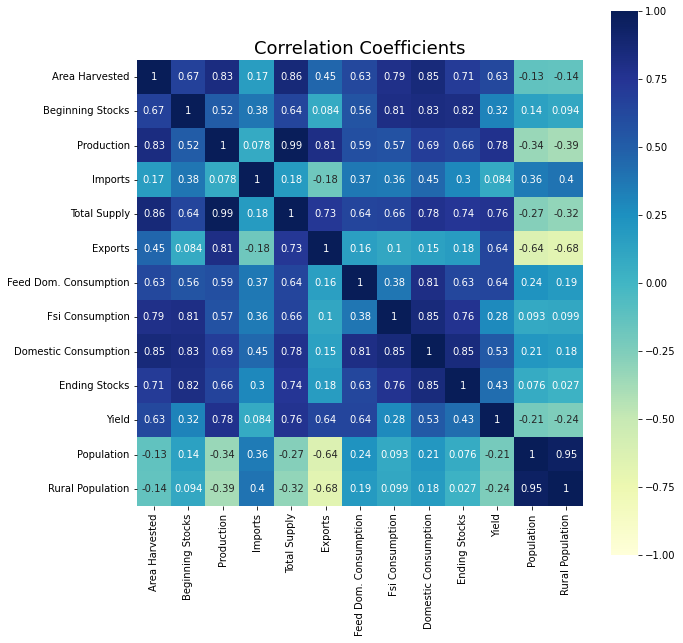

In [ ]:
# Creating a heatmap for Ukraine data set
plt.figure(figsize=(10, 10))
ax = sns.heatmap(df_ukr.corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu", annot=True, square=True);
ax.set_title('Correlation Coefficients', fontdict={'fontsize': 18});

In [ ]:
# Now we will plot the boxplots here


from plotly.subplots import make_subplots # Already imported them above
import plotly.graph_objects as go


# cols is a list of variables that we will do box plots on
cols = ['Area Harvested', 'Beginning Stocks', 'Production', 'Imports', 'Exports', 'Feed Dom. Consumption', 'Fsi Consumption',
        'Yield', 'Population', 'Rural Population']

fig = make_subplots(rows=2, cols=int(len(cols)/2))

for i, col in enumerate(cols):
  if i < 5:
    fig.add_trace(go.Box(y=df_ukr[col], name=col), row=1, col=i+1)
  else:
    j = i % 5
    fig.add_trace(go.Box(y=df_ukr[col], name=col), row=2, col=j+1)

fig.update_traces(showlegend=False)
fig.update_layout(height=700, width=950)
fig.show()

In [ ]:
# There seem to be the most number of outliers for Beginning Stocks, Imports, Exports Feed Dom. Consumption and Fsi Consumption.
# However, since the dataset itself is small and given the nature of the data it is unlikely to consider those outliers to
# be mistakes. Hence, we will NOT remove the outliers.

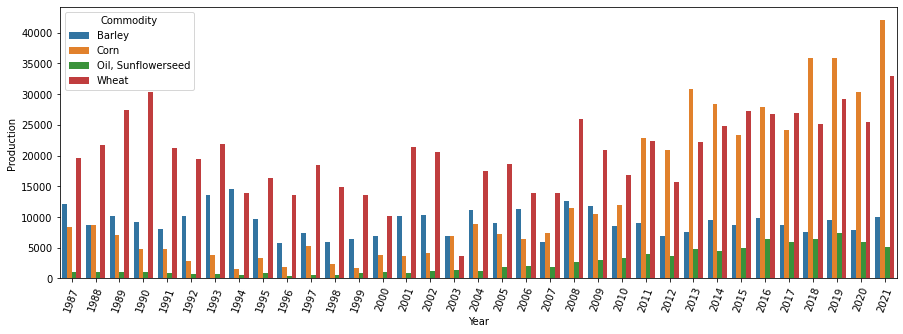

In [ ]:
# Now, we will plot a bar chart for Production vs. Year for Ukraine.

plt.figure(figsize=(15,5))
ax = sns.barplot(x='Year', y='Production', hue='Commodity', data=df_ukr_combined);
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);

In [ ]:
# df_ukr_combined.to_csv('ukr_data.csv') # Exporting the dataframes

# files.download('ukr_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>